In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv('all_data.csv')
df

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [6]:
df.head(5)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [8]:
df.shape

(96, 4)

In [9]:
df.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

# Goals: 
identify the relationship between the GDP and life expectancy of six countries.
Data: Three quantitative variables and one qualitative variable
Analysis: for identifying their relationship, we need to choose the right graph type. 


In [16]:
#Unique values of country variable

df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [18]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [21]:
df= df.rename({'Year': 'Year', 'Life expectancy at birth (years)': 'LEABY', 'GDP': 'GDP'}, axis= 'columns')
df

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


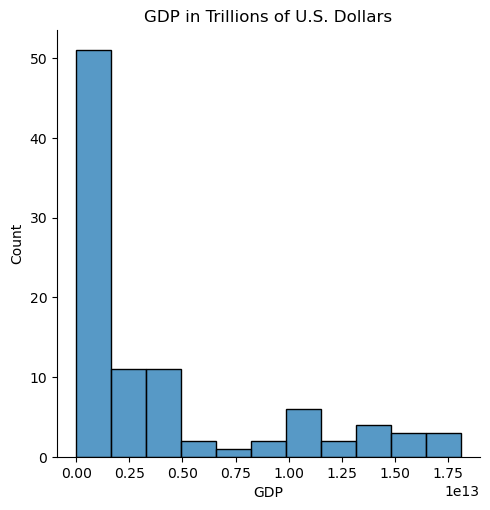

In [82]:
sns.displot(df.GDP)
plt.title("GDP in Trillions of U.S. Dollars")
plt.show()


 This graph shows skewness in right side of the graph and a peak on the left. Meaning high GDP is between 0-0.25

/var/folders/xb/8w3j4x3s6m557z2q_54vk1dm0000gp/T/ipykernel_33469/248449477.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LEABY)


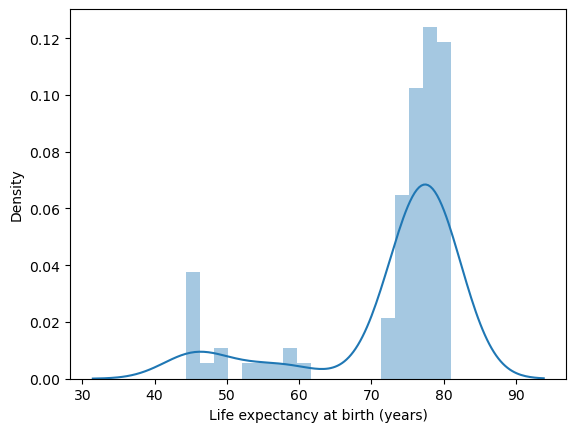

In [42]:
sns.distplot(df.LEABY)
plt.xlabel("Life expectancy at birth (years)")
plt.show()


This graph shows left skewness and shows high Life Expectancy at birth between 70-80 

In [84]:
#What is the average life expectancy in these nations?

dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()


In [51]:
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


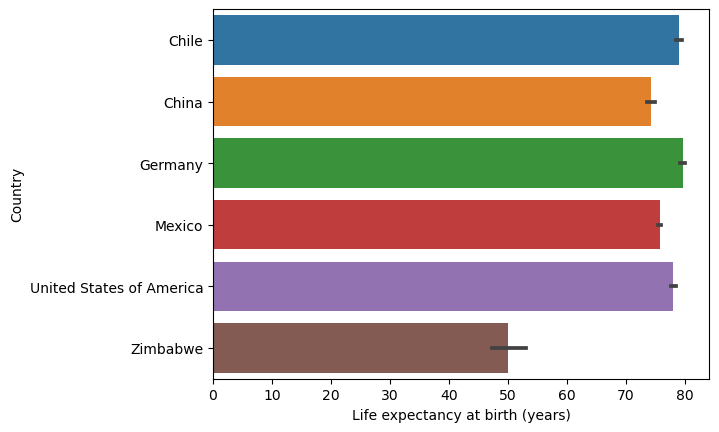

In [56]:
sns.barplot(x='LEABY', y= 'Country', data= df)
plt.xlabel("Life expectancy at birth (years)");
plt.show()

Looking at this graph, we see that Zimbabwe has the lowest life expectancy at birth whereas Chile has the highest.

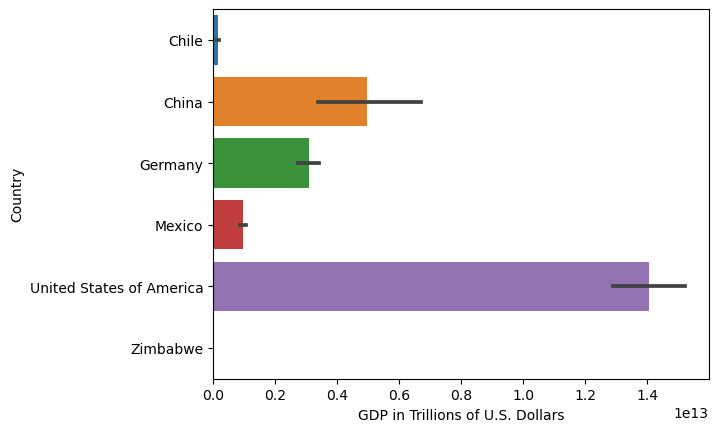

In [59]:
sns.barplot(x='GDP', y= 'Country', data= df)
plt.xlabel("GDP in Trillions of U.S. Dollars");
plt.show()

This graph shows that United States has the highest GDP. 

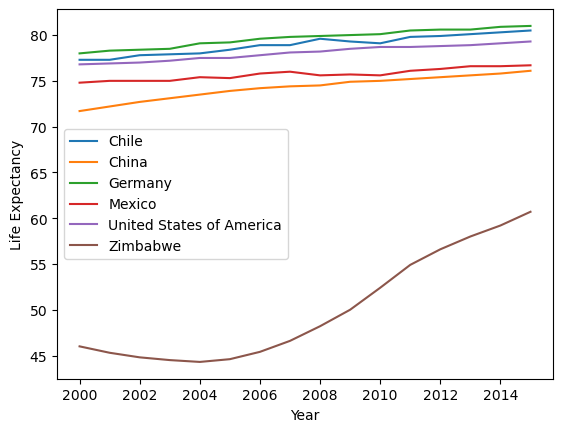

In [68]:
#Has life expectancy increased over time in the six nations?
#First, we need to group the data by country and year
country_year= df.groupby(['Year', 'Country']).mean().reset_index()
country_year
for country in country_year['Country'].unique():
    nation_data = country_year[country_year['Country'] == country]
    plt.plot(nation_data['Year'], nation_data['LEABY'], label=country)
    
plt.legend()
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

Looking at the line graph above, we see that among all six countries , Zimbabwe's Life Expectancy has increased over time from 
45 in 2004 to 60 in 2014. And the other nations do not seem to have increased much. 

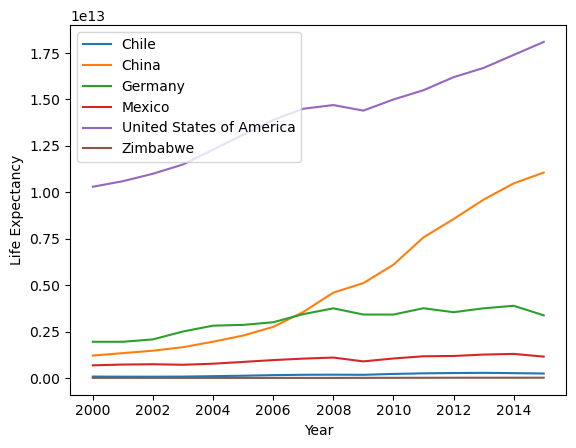

In [70]:
#Has GDP increased over time in the six nations?
country_year= df.groupby(['Year', 'Country']).mean().reset_index()
country_year
for country in country_year['Country'].unique():
    nation_data = country_year[country_year['Country'] == country]
    plt.plot(nation_data['Year'], nation_data['GDP'], label=country)
    
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

This line graph represents that United State's and China's GDP has increased over the period of 2000-2014.

In [74]:
#Is there a correlation between GDP and life expectancy of a country?

correlation = df['GDP'].corr(df['LEABY'])

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.3432067484491559


 This shows there is low positive correlation between GDP and Life expectency of a country

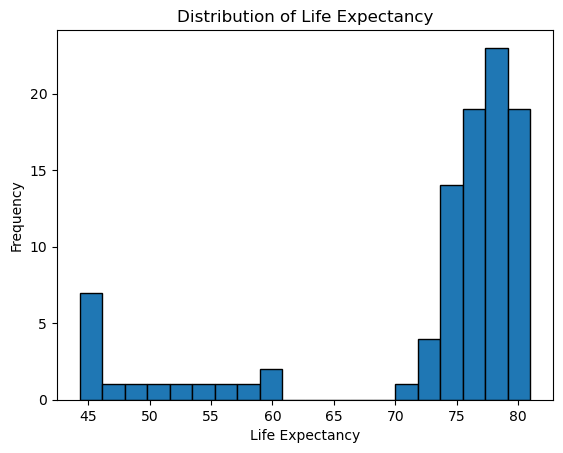

In [78]:
#What is the distribution of that life expectancy?

plt.hist(df['LEABY'], bins=20, edgecolor='black')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()


This distribution shows that there are high density in the right side of the graph meaning that life expectancy 
oof 75-80 is the most common one. 

# Conclusion:
Main components that you will want to include:

What did you learn throughout the process?
Are the results what you expected?
What are the key findings and takeaways?


 1. This project is aimed to analyze the relationship between GDP and Life Expectency of six countries naming: 
    United States, Zimbabwe, Germany, Mexico, Chile, China. 
    I first went through Data exploration to get to know the variables and spot inconsistencies and correct them
2.  In analysis part, this project delved deep on the distribution of both GDP and Life Expectancy of six countries
    Then the relationship between two variables 
3. I found that Zimbabwe has the lowest life expectancy at birth whereas Chile has the highest.
4. The visualization also showed that United States has the highest GDP.
5. Looking at the line graph above, we see that among all six countries , Zimbabwe's Life Expectancy has
increased over time from 45 in 2004 to 60 in 2014. And the other nations do not seem to have increased much.
6. The line graph represents that United State's and China's GDP has increased over the period of 2000-2014.
7. We also found that that there is low positive correlation between GDP and Life expectency of a country
    